# Timeseries Forecasting using ARIMA

#### Description:

This codebook covers how to use ARIMA to make a timeseries forecast.

#### Skill level:

- Intermediate

-------------------------
### Import the required libraries

In [ ]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
import HELPERS.machine_learning.model_evaluation as me
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

-------------------------
### Read data into a dataframe

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/aapl.txt'))

-------------------------
### Check shape and head of the dataframe

In [4]:
df_raw.shape

(2740, 5)

In [5]:
df_raw.head()

,date,open,high,close,volume
0,2010-01-04,7.622,7.661,7.643,493729600.0
1,2010-01-05,7.664,7.700,7.657,601904800.0
2,2010-01-06,7.657,7.687,7.535,552160000.0
3,2010-01-07,7.563,7.572,7.521,477131200.0
4,2010-01-08,7.511,7.572,7.571,447610800.0


-------------------------
### Check column data types

In [6]:
df_raw.dtypes

date       object
open      float64
high      float64
close     float64
volume    float64
dtype: object

-------------------------
### Convert date column to datetime format and sort records

In [7]:
df = df_raw

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

df = df.sort_values(['date']).reset_index(drop=True)

In [9]:
df.dtypes

date      datetime64[ns]
open             float64
high             float64
close            float64
volume           float64
dtype: object

-------------------------
### Check line plot of series

<Figure size 432x288 with 0 Axes>

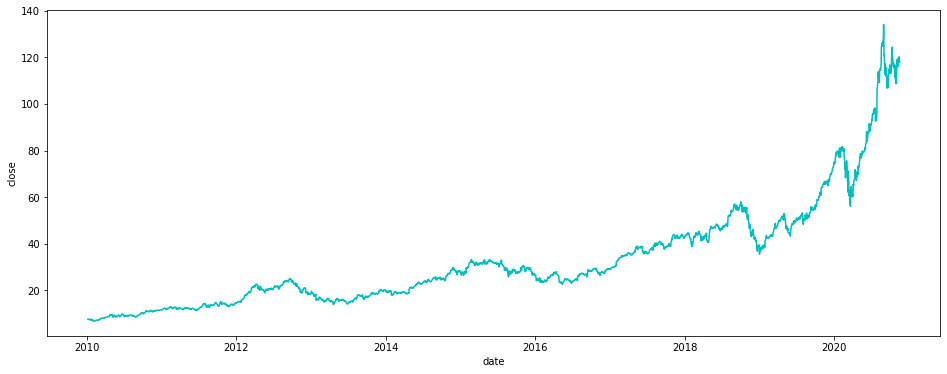

In [10]:
plt.clf()

fig = plt.figure(figsize=(16, 6))

ax = sns.lineplot(x='date', y='close', data=df, color='c')

-------------------------
### Decompose series to extract trend, seasonality and residuals

<Figure size 432x288 with 0 Axes>

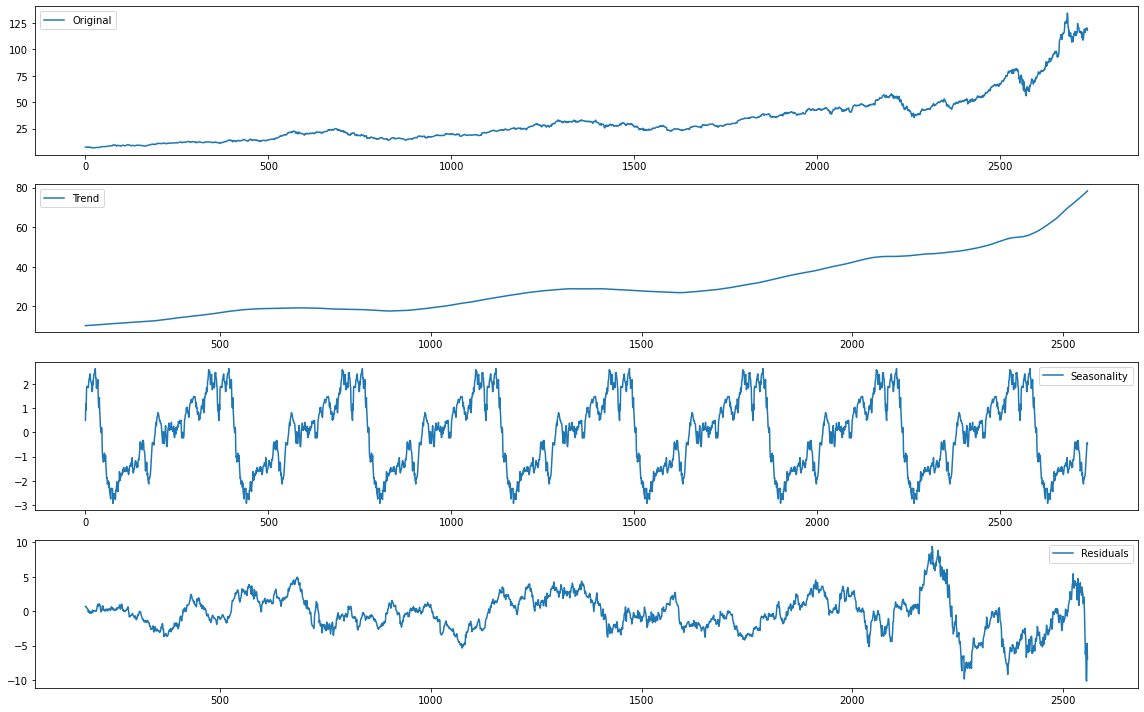

In [11]:
%matplotlib inline

plt.clf()

fig = plt.figure(figsize=(16, 10))

decomposition = seasonal_decompose(df['close'], period=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df['close'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

plt.close('all')

-------------------------
### Test the raw series for stationarity

In [12]:
def test_stationarity(timeseries):
    plt.clf()

    plt.figure(figsize=(16, 6))
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    
    plt.show(block=False)
    
    print('Augmented Dickey–Fuller test:')
    
    adf_test = adfuller(timeseries, autolag='AIC')
    
    
    
    df_results = pd.Series(adf_test[0:4], index=['test stat',
                                                 'p-value',
                                                 'lags',
                                                 'no. obs'])
    for key, val in adf_test[4].items():
        df_results['crit value (%s)' % key] = val
        
    print(df_results)

<Figure size 432x288 with 0 Axes>

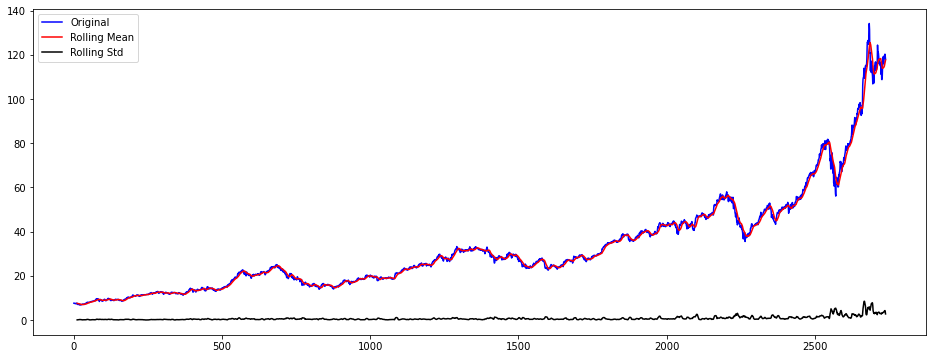

Augmented Dickey–Fuller test:
test stat              2.719303
p-value                0.999088
lags                  27.000000
no. obs             2712.000000
crit value (1%)       -3.432764
crit value (5%)       -2.862606
crit value (10%)      -2.567338
dtype: float64


In [13]:
test_stationarity(df['close'])

-------------------------
### Check the log transform of the series for stationarity

In [14]:
df['close_log'] = np.log(df['close']) 

<Figure size 432x288 with 0 Axes>

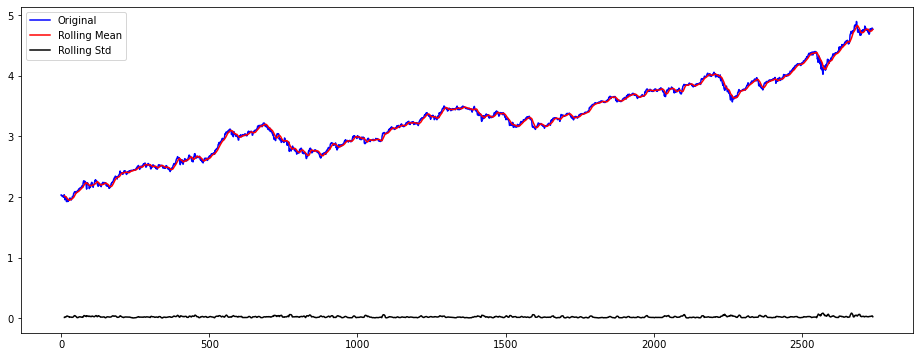

Augmented Dickey–Fuller test:
test stat             -0.523939
p-value                0.887260
lags                  22.000000
no. obs             2717.000000
crit value (1%)       -3.432759
crit value (5%)       -2.862604
crit value (10%)      -2.567337
dtype: float64


In [15]:
test_stationarity(df['close_log'])

-------------------------
### Check the ACF and PACF for the raw series

In [16]:
def get_acf_pacf(timeseries):
    plt.clf()

    fig = plt.figure(figsize=(12, 6))
    
    lag_acf = acf(timeseries, nlags=20)
    lag_pacf = pacf(timeseries, nlags=20, method='ols')

    plt.subplot(121) 
    
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    
    plt.title('Autocorrelation Function')

    plt.subplot(122)
    
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)),linestyle='--',color='gray')
    
    plt.title('Partial Autocorrelation Function')

    plt.tight_layout()

    plt.show()

C:\Users\buswedg\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

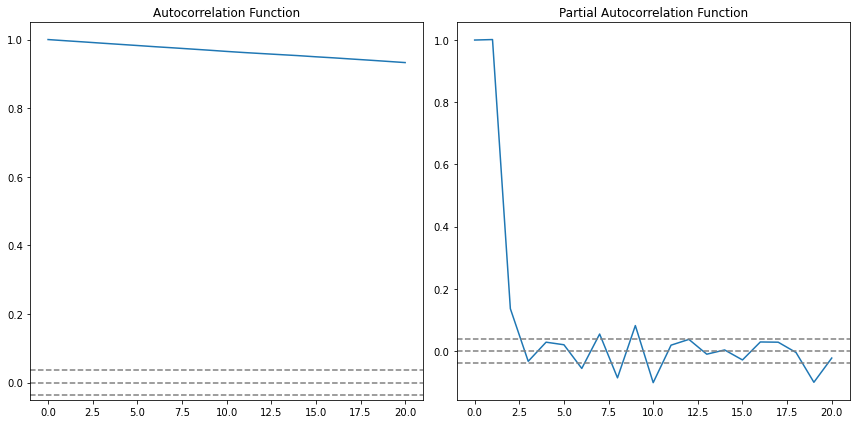

In [17]:
get_acf_pacf(df['close'])

-------------------------
### Check the ACF and PACF for the log transform of the series

C:\Users\buswedg\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

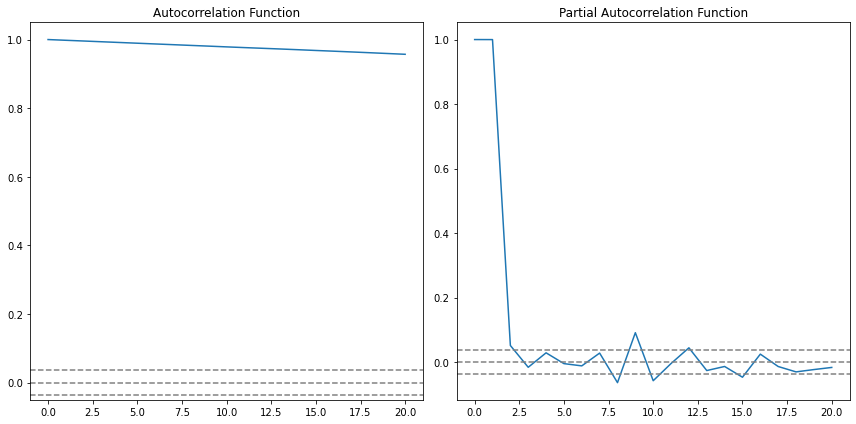

In [18]:
get_acf_pacf(df['close_log'])

-------------------------
### Fit ARIMA model for the raw series

In [19]:
def get_arma(timeseries):
    plt.clf()

    fig = plt.figure(figsize=(16, 10))
    
    ar = plt.subplot2grid((3,3), (0,0), rowspan=1, colspan=3)
    model = ARIMA(timeseries, order=(1, 0, 0))
    
    results_AR = model.fit()
    
    ar.plot(timeseries)
    ar.plot(results_AR.fittedvalues, color='red')
    
    plt.title('AR Model (1,0,0): RSS: %.4f'% sum((results_AR.fittedvalues-timeseries)**2))

    ma = plt.subplot2grid((3,3), (1,0), rowspan=1, colspan=3)
    model = ARIMA(timeseries, order=(0, 0, 1))  
    
    results_MA = model.fit()
    
    ma.plot(timeseries)
    ma.plot(results_MA.fittedvalues, color='red')
    
    plt.title('MA Model (0,0,1): RSS: %.4f'% sum((results_MA.fittedvalues-timeseries)**2))

    arma = plt.subplot2grid((3,3), (2,0), rowspan=1, colspan=3)
    model = ARIMA(timeseries, order=(1, 1, 1))  
    
    results_ARIMA = model.fit()
    
    arma.plot(timeseries)
    arma.plot(results_ARIMA.fittedvalues, color='red')
    
    plt.title('ARMA Model (1,1,1): RSS: %.4f'% sum((results_ARIMA.fittedvalues-timeseries)**2))

    plt.show()

C:\Users\buswedg\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<Figure size 432x288 with 0 Axes>

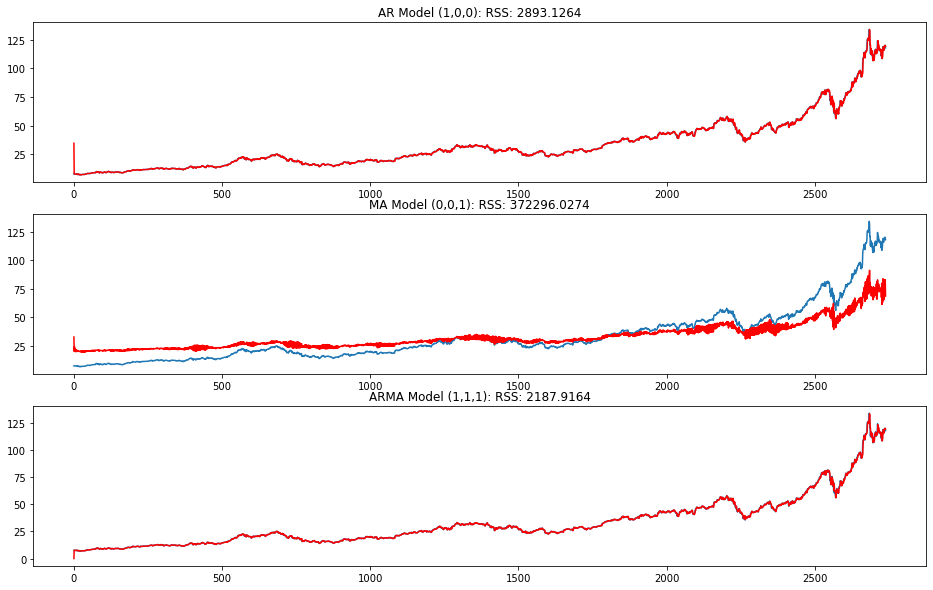

In [20]:
get_arma(df['close'])

-------------------------
### Fit ARIMA model for the log transform of the series

C:\Users\buswedg\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Figure size 432x288 with 0 Axes>

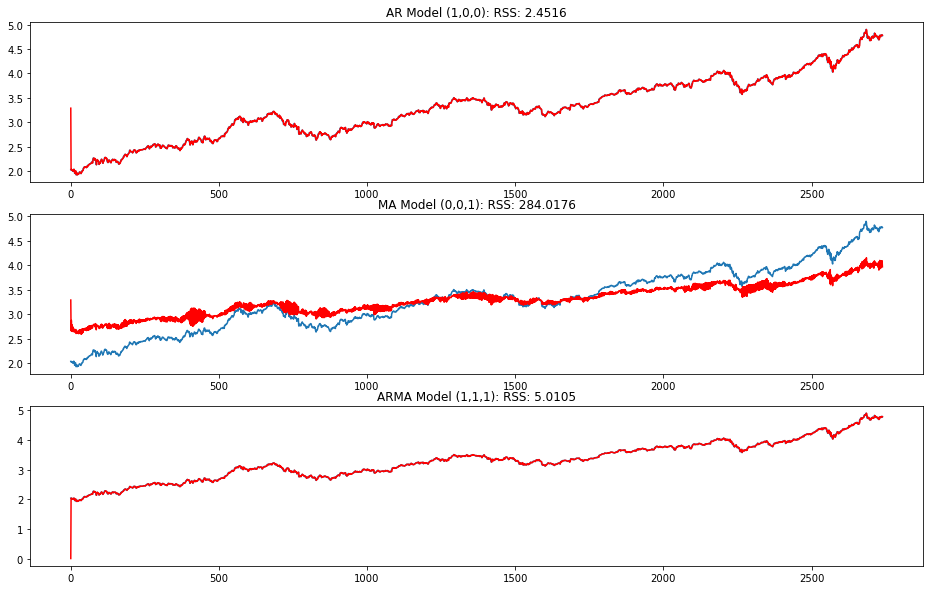

In [21]:
get_arma(df['close_log'])